In [1]:
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np 
import pickle

from sklearn.decomposition import PCA

In [2]:
from get_AM4_data_sw import get_AM4_data_sw

In [3]:
out_filelist = [f'./AM4_v1/20000101.fluxes.tile{_}.nc' for _ in range(1,7)]
inp_filelist = [f'./AM4_v1/20000101.new_offline_input.tile{_}.nc' for _ in range(1,7)]
# out_filelist = [f'/scratch/gpfs/rm5768/ml/20000101.fluxes.tile{_}.nc' for _ in range(1,7)]
# inp_filelist = [f'/scratch/gpfs/rm5768/ml/20000101.new_offline_input.tile{_}.nc' for _ in range(1,7)]
inp_filelist, out_filelist

(['./AM4_v1/20000101.new_offline_input.tile1.nc',
  './AM4_v1/20000101.new_offline_input.tile2.nc',
  './AM4_v1/20000101.new_offline_input.tile3.nc',
  './AM4_v1/20000101.new_offline_input.tile4.nc',
  './AM4_v1/20000101.new_offline_input.tile5.nc',
  './AM4_v1/20000101.new_offline_input.tile6.nc'],
 ['./AM4_v1/20000101.fluxes.tile1.nc',
  './AM4_v1/20000101.fluxes.tile2.nc',
  './AM4_v1/20000101.fluxes.tile3.nc',
  './AM4_v1/20000101.fluxes.tile4.nc',
  './AM4_v1/20000101.fluxes.tile5.nc',
  './AM4_v1/20000101.fluxes.tile6.nc'])

In [22]:
test_out = xr.open_mfdataset(out_filelist[1])
test_inp = xr.open_mfdataset(inp_filelist[1])
# test_out['rsd'].isel(phalf=-1).mean()

In [19]:
rsdt = test_out['rsd'].isel(phalf=0)[:10,:,:].load()

In [23]:
cosz = test_inp.cosine_zenith[:10,:,:].load()
rrsun = test_inp.earth_sun_distance_fraction[:10].load()
solarc = test_inp.solar_constant[:10].load()
dayfrac = test_inp.daylight_fraction[:10].load()

In [31]:
nlat = 50
nlon = 50

In [61]:
rsdt_cal = (solarc*rrsun*cosz[:,nlat,nlon]).values.flatten()
rsdt_tru = rsdt[:,nlat,nlon].values.flatten()


In [62]:
rsdt_cal,rsdt_tru

(array([ 695.4961 , 1244.2494 , 1049.544  ,  225.33765,    0.     ,
           0.     ,    0.     ,    0.     ,  696.0208 , 1245.1199 ],
       dtype=float32),
 array([ 695.49603, 1244.2493 , 1049.5438 ,  225.33768,    0.     ,
           0.     ,    0.     ,    0.     ,  696.0209 , 1245.1199 ],
       dtype=float32))

In [63]:
rsdt_cal/rsdt_tru

/home/cw55/anaconda3/envs/cg37/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


array([1.0000001 , 1.0000001 , 1.0000001 , 0.9999999 ,        nan,
              nan,        nan,        nan, 0.99999994, 1.        ],
      dtype=float32)

In [92]:
ntime=3
rsdt_cal = solarc[ntime]*rrsun[ntime]*cosz[ntime,:,:]*dayfrac[ntime,:,:]
rsdt_tru = rsdt[ntime,:,:]

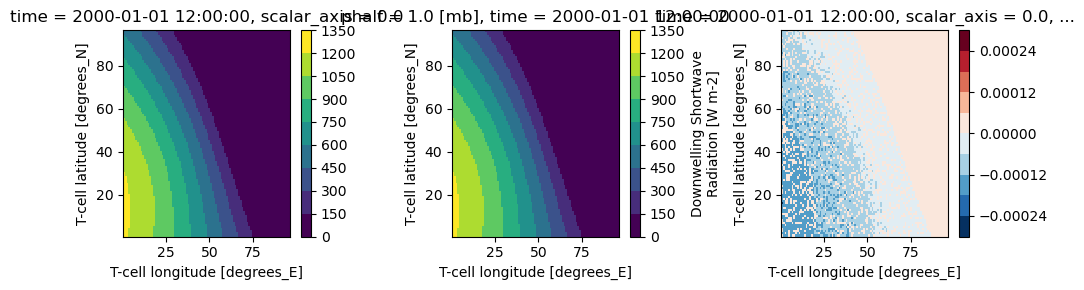

In [93]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(10,3),dpi=100) 
nlevels = 10
rsdt_cal.plot(ax = axs[0],levels=nlevels)
rsdt_tru.plot(ax = axs[1],levels=nlevels)
(rsdt_cal-rsdt_tru).plot(ax = axs[2],levels=nlevels)
fig.tight_layout()
fig.show()
